# ***À propos de l'ensemble de données***

**Présentation de l'ensemble de données :**

L'ensemble de données sur l'assurance maladie contient des informations sur plusieurs facteurs pouvant influencer les dépenses médicales, notamment l'âge, le sexe, l'IMC, le tabagisme, le nombre d'enfants et la région. Cet ensemble de données peut servir à former un modèle d'apprentissage automatique capable de prédire les dépenses médicales des nouveaux clients.

Fournir un aperçu des facteurs clés qui contribuent à l’augmentation des coûts d’assurance et aider l’entreprise à prendre des décisions plus éclairées en matière de tarification et d’évaluation des risques.

L'ensemble de données contient 27 000 lignes et 7 colonnes.
Les colonnes incluent:

- Âge (Quantitative)
- Sexe (qualitative binaire)
- IMC (Indice de masse corporelle)
- Enfants (quantitative)
- Fumeur qualitative binaire
- Région (qualitative)
-Frais (quantitative)

# ***Objectif***


Constuire un modele d'apprentissage automatique pour améliorer l’efficacité et la rentabilité des compagnies d’assurance maladie ?

# **Importations des bibliothèques**

In [15]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# **Importations de la base de données**

In [3]:
chemin = kagglehub.dataset_download("harishkumardatalab/medical-insurance-price-prediction")

print("Path to dataset files:", chemin)


for filename in os.listdir(chemin):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(chemin, filename)
        break


df = pd.read_csv(csv_file_path)
df

100%|██████████| 31.6k/31.6k [00:00<00:00, 43.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harishkumardatalab/medical-insurance-price-prediction/versions/1


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


# **Vérification des valeurs manquantes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# **Vérification des valeurs aberrantes**

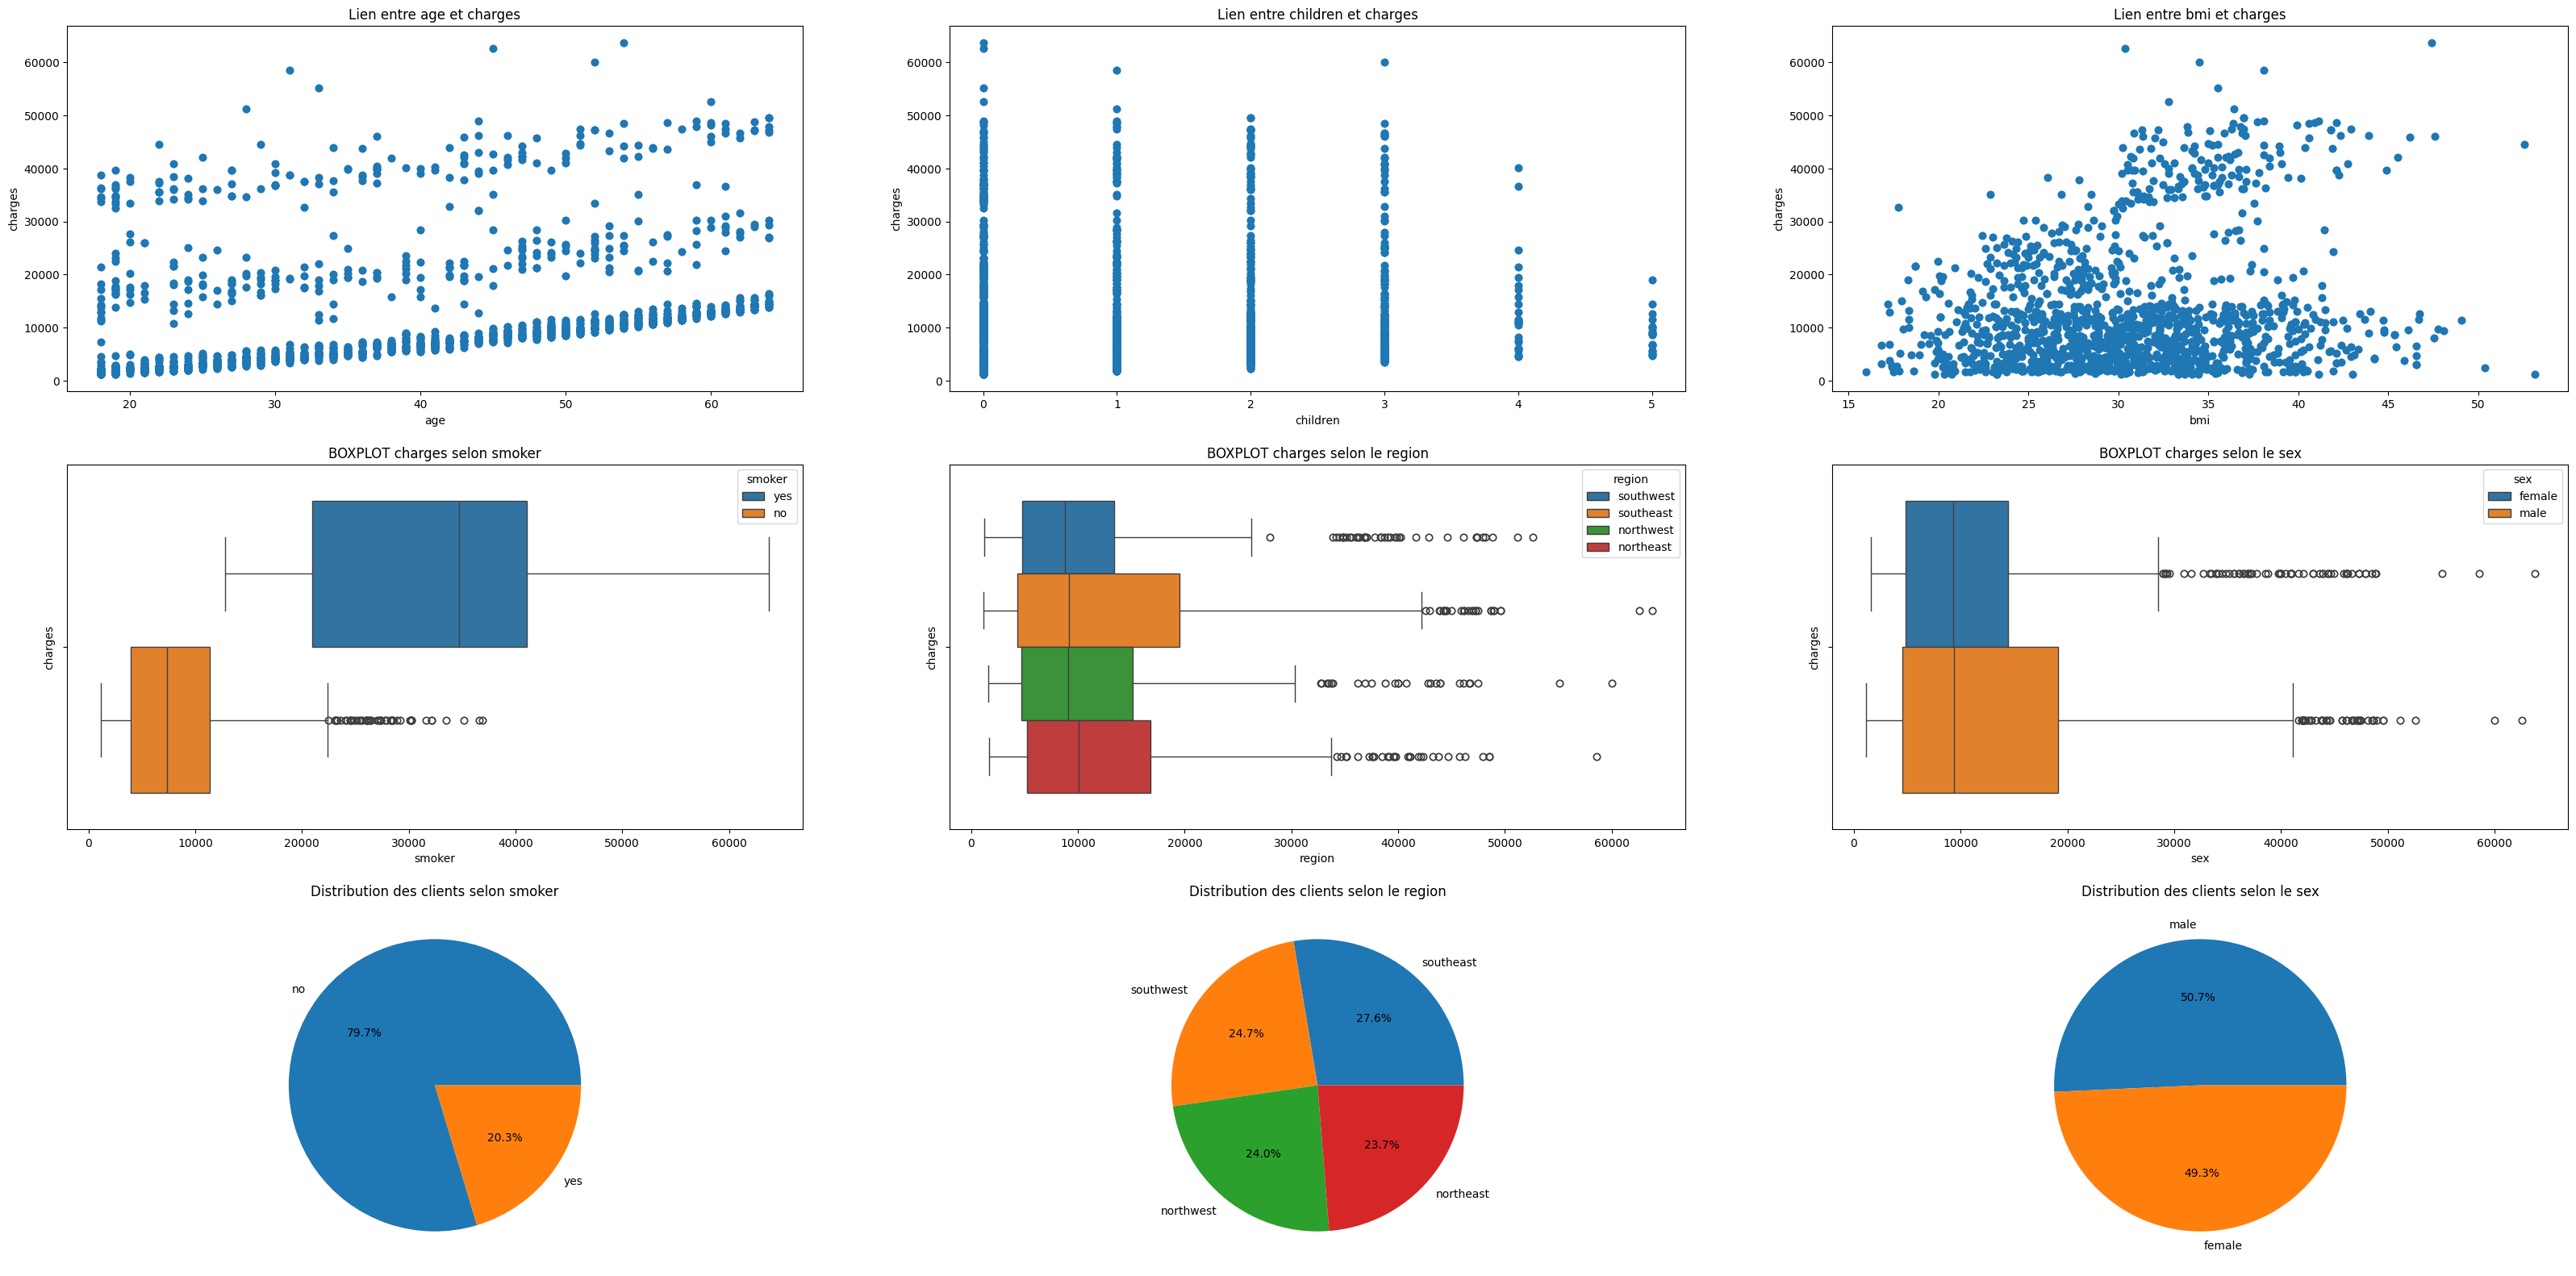

In [6]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(40,20))
axes[0][0].plot(df['age'],df['charges'],'o')
axes[0][0].set_ylabel('charges')
axes[0][0].set_xlabel('age')
axes[0][0].set_title('Lien entre age et charges')

axes[0][1].plot(df['children'],df['charges'],'o')
axes[0][1].set_ylabel('charges')
axes[0][1].set_xlabel('children')
axes[0][1].set_title('Lien entre children et charges')

axes[0][2].plot(df['bmi'],df['charges'],'o')
axes[0][2].set_ylabel('charges')
axes[0][2].set_xlabel('bmi')
axes[0][2].set_title('Lien entre bmi et charges')

sns.boxplot(x="charges",data=df,hue="smoker",ax=axes[1][0])
axes[1][0].set_ylabel('charges')
axes[1][0].set_xlabel('smoker')
axes[1][0].set_title('BOXPLOT charges selon smoker')

sns.boxplot(x="charges",data=df,hue="region",ax=axes[1][1])
axes[1][1].set_ylabel('charges')
axes[1][1].set_xlabel('region')
axes[1][1].set_title('BOXPLOT charges selon le region')

sns.boxplot(x="charges",data=df,hue="sex",ax=axes[1][2])
axes[1][2].set_ylabel('charges')
axes[1][2].set_xlabel('sex')
axes[1][2].set_title('BOXPLOT charges selon le sex')


axes[2][0].pie(x=df['smoker'].value_counts(),labels=df['smoker'].value_counts().index,autopct='%1.1f%%')

axes[2][0].set_title('Distribution des clients selon smoker')


axes[2][1].pie(x=df['region'].value_counts(),labels=df['region'].value_counts().index,autopct='%1.1f%%')

axes[2][1].set_title('Distribution des clients selon le region')



axes[2][2].pie(x=df['sex'].value_counts(),labels=df['sex'].value_counts().index,autopct='%1.1f%%')

axes[2][2].set_title('Distribution des clients selon le sex')

plt.show()

# ***Statistiques descriptives***

In [7]:
statistiques = df.groupby(['sex', 'smoker'])['charges'].describe()

statistiques

count          mean           std         min           25%  \
sex    smoker                                                                 
female no      1134.0   8756.307017   6041.623960   1607.5101   4200.566575   
       yes      232.0  30721.380703  11838.728246  13844.5060  19747.243325   
male   no      1074.0   8060.534956   5969.941470   1121.8739   3591.480000   
       yes      332.0  33272.561758  11192.832907  12829.4551  21259.377950   

                       50%           75%          max  
sex    smoker                                          
female no       7640.30920  11832.988525  36910.60803  
       yes     29045.91475  40911.257000  63770.42801  
male   no       6940.90985  10796.350250  32108.66282  
       yes     36193.40035  41949.244100  62592.87309

In [8]:
df.groupby('region')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,658.0,13475.874737,11310.618603,1694.7964,5209.578850,10072.05505,16776.304050,58571.07448
northwest,664.0,12463.129315,10996.174365,1621.3402,4733.635288,9081.14720,15153.617225,60021.39897
southeast,766.0,14748.777706,14138.464968,1121.8739,4349.725100,9140.95100,19534.924300,63770.42801
southwest,684.0,12164.196435,11419.830441,1241.5650,4746.344000,8790.53100,13390.559000,52590.82939


In [9]:
df['age'].describe()

,age
count,2772.000000
mean,39.109668
std,14.081459
min,18.000000
25%,26.000000
50%,39.000000
75%,51.000000
max,64.000000


In [10]:
df['bmi'].describe()

,bmi
count,2772.000000
mean,30.701349
std,6.129449
min,15.960000
25%,26.220000
50%,30.447500
75%,34.770000
max,53.130000


In [11]:
df['children'].describe()

,children
count,2772.000000
mean,1.101732
std,1.214806
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [13]:
df['charges'].describe()

,charges
count,2772.000000
mean,13261.369959
std,12151.768945
min,1121.873900
25%,4687.797000
50%,9333.014350
75%,16577.779500
max,63770.428010


# **🧹 Prétraitement**

In [14]:
map={'yes':1,'no':0}
df['smoker']=df['smoker'].map(map).astype(bool)
map_2={'male':1,'female':0}
df['sex']=df['sex'].map(map_2).astype(bool)
map_3={'southwest':'Nord','southeast':'Sud','northwest':'Est','northeast':'Ouest'}
df['region']=df['region'].map(map_3)

# **Modèle**

# ***SKLEARN***

In [16]:
Y = df['charges']
X = df.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Prétraitement : standardisation des variables numériques
preprocessor = ColumnTransformer(transformers=[
    ('Variables quantitatives', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
    ('Variable qualitative', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X.select_dtypes(include=['object']).columns),
    ('Variables binaires', 'passthrough', X.select_dtypes(include=['bool']).columns)


])

# Pipeline avec RandomForestRegressor
model = make_pipeline(
    preprocessor,
    RandomForestRegressor(
        random_state=42,
        # Paramètres par défaut plus conservateurs
        n_jobs=-1,  # Utilise tous les processeurs disponibles
        oob_score=True  # Active le score Out-of-Bag pour évaluation
    )
)


param_grid = {
    'randomforestregressor__n_estimators': [80, 90, 100,200],
    'randomforestregressor__max_depth': [5, 10, 15, None,20,25,30],
    'randomforestregressor__min_samples_split': [2, 5, 10,15,20],
    'randomforestregressor__min_samples_leaf': [8, 10, 20,25],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__oob_score': [True, False]
}


grid_model = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1,
    verbose=3
)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Variables '
                                                                         'quantitatives',
                                                                         StandardScaler(),
                                                                         Index(['age', 'bmi', 'children'], dtype='object')),
                                                                        ('Variable '
                                                                         'qualitative',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['region'], dtype='object')),
                                                                        ('Variables '
                                                                         'binaires',
                                                                         'passthrough',
                                                                         Index...
                                                              20, 25, 30],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [8, 10, 20,
                                                                     25],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15, 20],
                         'randomforestregressor__n_estimators': [80, 90, 100,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

# ***Meilleurs hyperparamètres***

In [17]:

print("Meilleurs paramètres :", grid_model.best_params_)

Meilleurs paramètres : {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 8, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 200, 'randomforestregressor__oob_score': True}


In [18]:
best_model =grid_model.best_estimator_
y_pred = best_model.predict(X_test)

# ***Évaluation***

In [19]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE : {rmse}")
print(f"R² : {r2}")
print(f"MAPE : {mape}")

RMSE : 19403113.752773795
R² : 0.8759935499280459
MAPE : 0.2516969352977219


# **Analyse des Résidus**

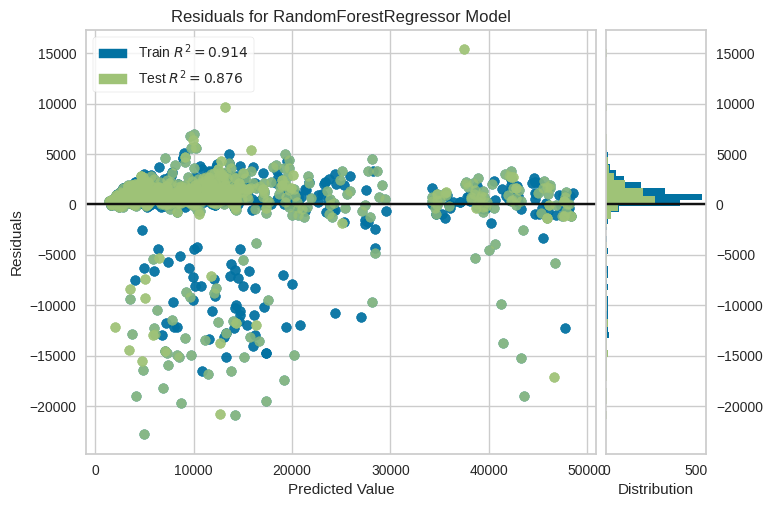

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
from yellowbrick.regressor import ResidualsPlot, prediction_error
resisdu=ResidualsPlot(best_model)
resisdu.fit(X_train,y_train)
resisdu.score(X_test,y_test)
resisdu.show()

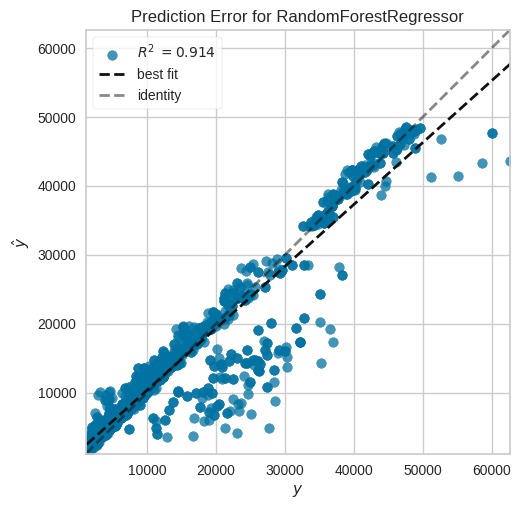

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
from yellowbrick.regressor import prediction_error
error = prediction_error(best_model, X_train, y_train)

error.score(X_test, y_test)
error.show()

# **Courbes d'apprentissage**

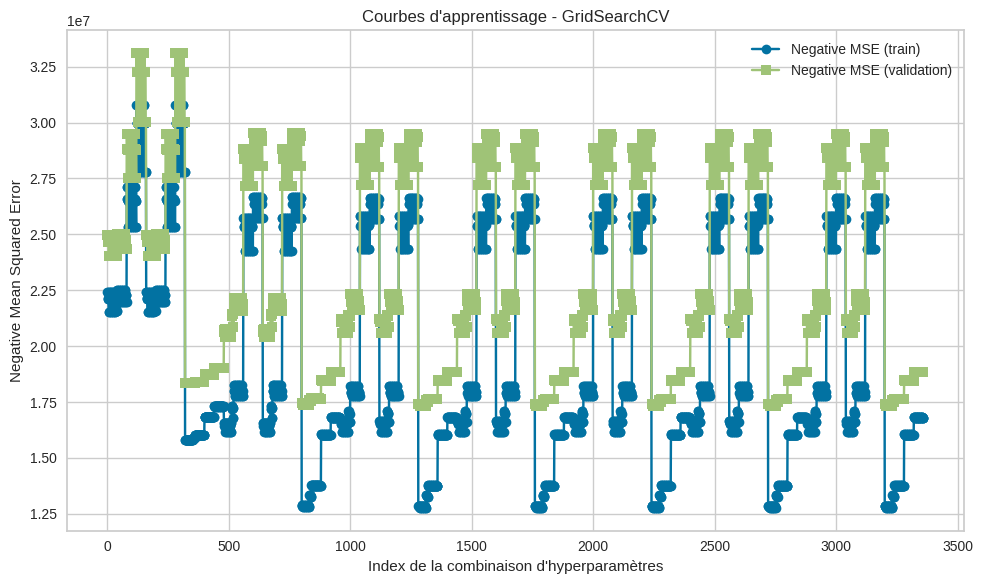

In [23]:
results = grid_model.cv_results_
train_scores = -results['mean_train_score']
val_scores = -results['mean_test_score']

param_combinations = range(len(train_scores))

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(param_combinations, train_scores, label='Negative MSE (train)', marker='o')
plt.plot(param_combinations, val_scores, label='Negative MSE (validation)', marker='s')
plt.xlabel("Index de la combinaison d'hyperparamètres")
plt.ylabel("Negative Mean Squared Error")
plt.title("Courbes d'apprentissage - GridSearchCV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Indices de Sobol**

In [ ]:
!pip install openturns

In [25]:
import openturns as ot
from sklearn.preprocessing import LabelEncoder

# Configuration d'OpenTURNS
ot.RandomGenerator.SetSeed(1976)

class SobolAnalysisForRandomForest:
    """
    Classe pour l'analyse de sensibilité de Sobol appliquée à un modèle entraîné
    Gère les variables numériques, binaires et catégorielles multi-modalités
    """

    def __init__(self, X, fitted_model):
        """
        Initialise l'analyse avec les données d'entrée et le modèle déjà entraîné

        Parameters:
        -----------
        X : DataFrame
            Variables explicatives (utilisées pour définir les distributions)
        fitted_model : sklearn model
            Modèle déjà entraîné (ex: votre GridSearchCV fitted)
        """
        self.X = X.copy()
        self.fitted_model = fitted_model
        self.input_distributions = None
        self.ot_function = None
        self.label_encoders = {}
        self.variable_info = {}  # Stocke les infos sur chaque variable

    def _analyze_variable_types(self):
        """
        Analyse les types de variables dans le dataset
        """
        self.variable_info = {}

        for col in self.X.columns:
            if self.X[col].dtype in ['int64', 'float64']:
                # Variable numérique
                unique_vals = self.X[col].nunique()
                if unique_vals == 2 and set(self.X[col].unique()).issubset({0, 1}):
                    self.variable_info[col] = {
                        'type': 'binary_numeric',
                        'unique_values': sorted(self.X[col].unique())
                    }
                else:
                    self.variable_info[col] = {
                        'type': 'numeric',
                        'mean': self.X[col].mean(),
                        'std': self.X[col].std()
                    }

            elif self.X[col].dtype == 'bool':
                # Variable booléenne
                self.variable_info[col] = {
                    'type': 'binary_bool',
                    'proportion': self.X[col].mean()
                }

            elif self.X[col].dtype == 'object' or self.X[col].dtype.name == 'category':
                # Variable catégorielle
                unique_vals = self.X[col].nunique()
                if unique_vals == 2:
                    self.variable_info[col] = {
                        'type': 'binary_categorical',
                        'unique_values': list(self.X[col].unique()),
                        'proportions': self.X[col].value_counts(normalize=True).to_dict()
                    }
                else:
                    self.variable_info[col] = {
                        'type': 'categorical',
                        'unique_values': list(self.X[col].unique()),
                        'proportions': self.X[col].value_counts(normalize=True).to_dict()
                    }

        print("Types de variables détectés:")
        for col, info in self.variable_info.items():
            print(f"  {col}: {info['type']}")

    def _prepare_data_for_openturns(self):
        """
        Prépare les données pour OpenTURNS en encodant les variables catégorielles
        """
        self.X_encoded = self.X.copy()

        for col in self.X.columns:
            var_type = self.variable_info[col]['type']

            if var_type in ['categorical', 'binary_categorical']:
                # Encoder les variables catégorielles
                le = LabelEncoder()
                self.X_encoded[col] = le.fit_transform(self.X[col])
                self.label_encoders[col] = le

                # Mettre à jour les informations avec les valeurs encodées
                self.variable_info[col]['encoded_values'] = list(range(len(le.classes_)))
                self.variable_info[col]['class_mapping'] = dict(zip(
                    range(len(le.classes_)), le.classes_
                ))

    def create_input_distributions(self):
        """
        Crée les distributions d'entrée pour OpenTURNS basées sur les données
        """
        self._analyze_variable_types()
        self._prepare_data_for_openturns()

        self.input_distributions = []
        self.variable_names = []

        for col in self.X.columns:
            var_type = self.variable_info[col]['type']

            if var_type == 'numeric':
                # Variable numérique continue
                mean_val = self.variable_info[col]['mean']
                std_val = self.variable_info[col]['std']

                # Éviter les écarts-types nuls
                if std_val == 0:
                    std_val = 1e-6

                dist = ot.Normal(mean_val, std_val)
                dist.setDescription([col])
                self.input_distributions.append(dist)
                self.variable_names.append(col)

            elif var_type == 'binary_numeric':
                # Variable binaire numérique (0/1)
                p = (self.X_encoded[col] == 1).mean()
                dist = ot.Bernoulli(p)
                dist.setDescription([col])
                self.input_distributions.append(dist)
                self.variable_names.append(col)

            elif var_type == 'binary_bool':
                # Variable booléenne
                p = self.variable_info[col]['proportion']
                dist = ot.Bernoulli(p)
                dist.setDescription([col])
                self.input_distributions.append(dist)
                self.variable_names.append(col)

            elif var_type in ['binary_categorical', 'categorical']:
                # Variables catégorielles (binaires ou multi-modalités)
                encoded_values = self.variable_info[col]['encoded_values']
                proportions = []

                for encoded_val in encoded_values:
                    original_val = self.variable_info[col]['class_mapping'][encoded_val]
                    prop = self.variable_info[col]['proportions'][original_val]
                    proportions.append(prop)

                # Utiliser une distribution multinomiale discrète
                dist = ot.UserDefined([[val] for val in encoded_values], proportions)
                dist.setDescription([col])
                self.input_distributions.append(dist)
                self.variable_names.append(col)

        # Créer la distribution composée
        self.composed_distribution = ot.ComposedDistribution(self.input_distributions)
        self.composed_distribution.setDescription(self.variable_names)

        print(f"\nDistributions créées pour {len(self.variable_names)} variables")

    def create_openturns_function(self):
        """
        Crée une fonction OpenTURNS à partir du modèle entraîné
        """
        def model_function(X):
            # Convertir l'entrée OpenTURNS en DataFrame pandas
            X_df = pd.DataFrame([X], columns=self.variable_names)

            # Décoder les variables catégorielles si nécessaire
            for col in self.variable_names:
                var_type = self.variable_info[col]['type']

                if var_type in ['categorical', 'binary_categorical']:
                    # Convertir en entier puis décoder
                    encoded_val = int(round(X_df[col].iloc[0]))
                    # S'assurer que la valeur est dans les limites
                    max_encoded = max(self.variable_info[col]['encoded_values'])
                    encoded_val = max(0, min(encoded_val, max_encoded))

                    # Décoder la valeur
                    original_val = self.variable_info[col]['class_mapping'][encoded_val]
                    X_df[col] = original_val

                elif var_type == 'binary_bool':
                    # Convertir en booléen
                    X_df[col] = bool(round(X_df[col].iloc[0]))

                elif var_type == 'binary_numeric':
                    # S'assurer que c'est 0 ou 1
                    X_df[col] = int(round(X_df[col].iloc[0]))

            # Appliquer le modèle
            try:
                prediction = self.fitted_model.predict(X_df)
                return [float(prediction[0])]
            except Exception as e:
                print(f"Erreur lors de la prédiction: {e}")
                print(f"Données d'entrée: {X_df}")
                return [0.0]  # Valeur par défaut

        # Créer la fonction OpenTURNS
        dim_input = len(self.variable_names)
        dim_output = 1

        self.ot_function = ot.PythonFunction(dim_input, dim_output, model_function)
        self.ot_function.setInputDescription(self.variable_names)
        self.ot_function.setOutputDescription(["Prediction"])

    def compute_sobol_indices(self, size=1000, computeSecondOrder=False):
        """
        Calcule les indices de Sobol

        Parameters:
        -----------
        size : int
            Taille de l'échantillon pour l'analyse de Sobol
        computeSecondOrder : bool
            Si True, calcule les indices de second ordre
        """
        # Créer l'expérience de Sobol
        sie = ot.SobolIndicesExperiment(self.composed_distribution, size, computeSecondOrder)
        inputDesign = sie.generate()

        # Évaluer le modèle
        print(f"Évaluation du modèle sur {inputDesign.getSize()} points...")
        outputDesign = self.ot_function(inputDesign)

        # Calculer les indices de Sobol
        self.sensitivity_analysis = ot.SaltelliSensitivityAlgorithm(
            inputDesign, outputDesign, size
        )
        self.sensitivity_analysis.setUseAsymptoticDistribution(True)

        # Récupérer les indices
        self.first_order_indices = self.sensitivity_analysis.getFirstOrderIndices()
        self.total_order_indices = self.sensitivity_analysis.getTotalOrderIndices()

        print("Indices de Sobol calculés avec succès!")

    def display_results(self):
        """
        Affiche les résultats de l'analyse de sensibilité avec informations sur les variables
        """
        print("\n=== RÉSULTATS DE L'ANALYSE DE SENSIBILITÉ ===")

        print("\nInformations sur les variables:")
        for i, name in enumerate(self.variable_names):
            var_type = self.variable_info[name]['type']
            print(f"{name} ({var_type}):")

            if var_type == 'categorical':
                unique_vals = self.variable_info[name]['unique_values']
                print(f"  Modalités: {unique_vals}")
            elif var_type == 'binary_categorical':
                unique_vals = self.variable_info[name]['unique_values']
                print(f"  Modalités: {unique_vals}")

        print("\nIndices de premier ordre (effet principal):")
        for i, name in enumerate(self.variable_names):
            print(f"{name}: {self.first_order_indices[i]:.4f}")

        print("\nIndices totaux (effet principal + interactions):")
        for i, name in enumerate(self.variable_names):
            print(f"{name}: {self.total_order_indices[i]:.4f}")

        # Tri par importance (indices totaux)
        importance_ranking = sorted(
            zip(self.variable_names, self.total_order_indices),
            key=lambda x: x[1], reverse=True
        )

        print("\nClassement par importance (indices totaux):")
        for i, (name, importance) in enumerate(importance_ranking, 1):
            var_type = self.variable_info[name]['type']
            print(f"{i}. {name} ({var_type}): {importance:.4f}")

        print("\nInterprétation:")
        print("- Les indices de premier ordre mesurent l'effet principal de chaque variable")
        print("- Les indices totaux incluent les interactions avec les autres variables")
        print("- Plus l'indice est élevé, plus la variable est importante")
        print("- Variables catégorielles gérées via encodage numérique")

    def plot_sobol_indices_matplotlib(self):
        """
        Trace les indices de Sobol avec matplotlib - version améliorée
        """
        # Trier les variables par importance (indices totaux)
        sorted_indices = sorted(
            zip(self.variable_names, self.first_order_indices, self.total_order_indices),
            key=lambda x: x[2], reverse=True
        )

        sorted_names = [x[0] for x in sorted_indices]
        sorted_first = [x[1] for x in sorted_indices]
        sorted_total = [x[2] for x in sorted_indices]

        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        x = np.arange(len(sorted_names))
        width = 0.35

        bars1 = ax.bar(x - width/2, sorted_first, width,
                      label='Indice de premier ordre', alpha=0.8, color='skyblue')
        bars2 = ax.bar(x + width/2, sorted_total, width,
                      label='Indice total', alpha=0.8, color='lightcoral')

        ax.set_xlabel('Variables')
        ax.set_ylabel('Indices de Sobol')
        ax.set_title('Analyse de sensibilité - Indices de Sobol\n(Variables triées par importance)')
        ax.set_xticks(x)

        # Créer des labels avec le type de variable
        labels_with_type = []
        for name in sorted_names:
            var_type = self.variable_info[name]['type']
            type_abbrev = {
                'numeric': 'num',
                'binary_numeric': 'bin',
                'binary_bool': 'bool',
                'binary_categorical': 'cat2',
                'categorical': 'cat+'
            }.get(var_type, var_type)
            labels_with_type.append(f"{name}\n({type_abbrev})")

        ax.set_xticklabels(labels_with_type, rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Ajouter les valeurs sur les barres
        for bar in bars1:
            height = bar.get_height()
            if height > 0.001:  # N'afficher que si significatif
                ax.annotate(f'{height:.3f}',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),
                           textcoords="offset points",
                           ha='center', va='bottom', fontsize=8)

        for bar in bars2:
            height = bar.get_height()
            if height > 0.001:  # N'afficher que si significatif
                ax.annotate(f'{height:.3f}',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),
                           textcoords="offset points",
                           ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()

    def plot_sobol_indices(self):
        """
        Trace les indices de Sobol
        """
        try:
            # Utiliser la fonction OpenTURNS pour tracer
            graph = ot.SaltelliSensitivityAlgorithm.DrawSobolIndices(
                self.variable_names,
                self.first_order_indices,
                self.total_order_indices
            )

            # Afficher le graphique
            import openturns.viewer as viewer
            fig = viewer.View(graph)
            plt.title("Indices de Sobol - Analyse de sensibilité")
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Erreur lors de la création du graphique OpenTURNS: {e}")

        # Graphique avec matplotlib (toujours affiché)
        self.plot_sobol_indices_matplotlib()

    def get_variable_importance_summary(self):
        """
        Retourne un résumé de l'importance des variables
        """
        summary = []
        for i, name in enumerate(self.variable_names):
            var_info = self.variable_info[name]
            summary.append({
                'variable': name,
                'type': var_info['type'],
                'first_order_index': self.first_order_indices[i],
                'total_order_index': self.total_order_indices[i],
                'interaction_effect': self.total_order_indices[i] - self.first_order_indices[i]
            })

        # Trier par importance totale
        summary.sort(key=lambda x: x['total_order_index'], reverse=True)
        return summary

    def run_complete_analysis(self, sobol_size=1000):
        """
        Exécute l'analyse complète avec le modèle déjà entraîné

        Parameters:
        -----------
        sobol_size : int
            Taille de l'échantillon pour l'analyse de Sobol
        """
        print("=== ANALYSE DE SENSIBILITÉ AVEC INDICES DE SOBOL ===")
        print("Version améliorée - Support des variables catégorielles")

        # 1. Création des distributions d'entrée
        print("\n1. Analyse des types de variables et création des distributions...")
        self.create_input_distributions()

        # 2. Création de la fonction OpenTURNS
        print("\n2. Création de la fonction OpenTURNS...")
        self.create_openturns_function()

        # 3. Calcul des indices de Sobol
        print("\n3. Calcul des indices de Sobol...")
        self.compute_sobol_indices(size=sobol_size)

        # 4. Affichage des résultats
        print("\n4. Affichage des résultats...")
        self.display_results()

        # 5. Tracé des graphiques
        print("\n5. Tracé des graphiques...")
        self.plot_sobol_indices()

        # 6. Résumé de l'importance
        summary = self.get_variable_importance_summary()

        return self, summary

=== ANALYSE DE SENSIBILITÉ AVEC INDICES DE SOBOL ===
Version améliorée - Support des variables catégorielles

1. Analyse des types de variables et création des distributions...
Types de variables détectés:
  age: numeric
  sex: binary_bool
  bmi: numeric
  children: numeric
  smoker: binary_bool
  region: categorical

Distributions créées pour 6 variables

2. Création de la fonction OpenTURNS...

3. Calcul des indices de Sobol...
Évaluation du modèle sur 8000 points...
Indices de Sobol calculés avec succès!

4. Affichage des résultats...

=== RÉSULTATS DE L'ANALYSE DE SENSIBILITÉ ===

Informations sur les variables:
age (numeric):
sex (binary_bool):
bmi (numeric):
children (numeric):
smoker (binary_bool):
region (categorical):
  Modalités: ['Est', 'Ouest', 'Sud', 'Nord']

Indices de premier ordre (effet principal):
age: 0.0923
sex: -0.0021
bmi: 0.0456
children: 0.0030
smoker: 0.8736
region: -0.0032

Indices totaux (effet principal + interactions):
age: 0.1263
sex: 0.0005
bmi: 0.1734
ch

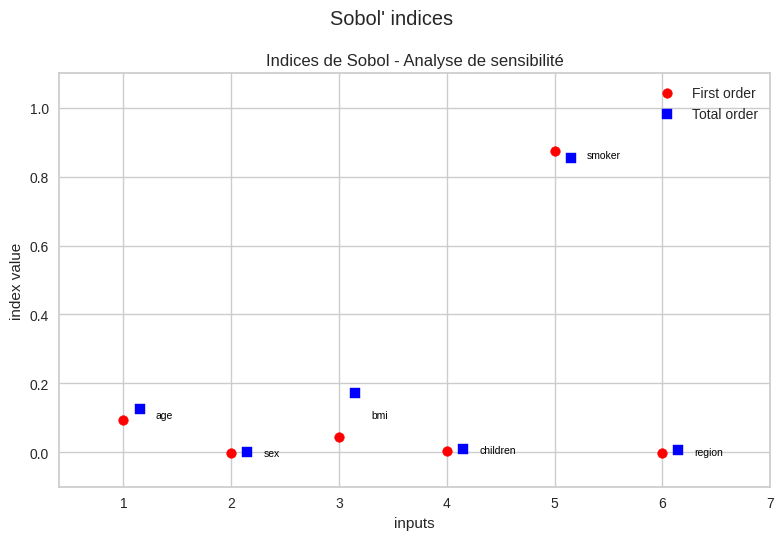

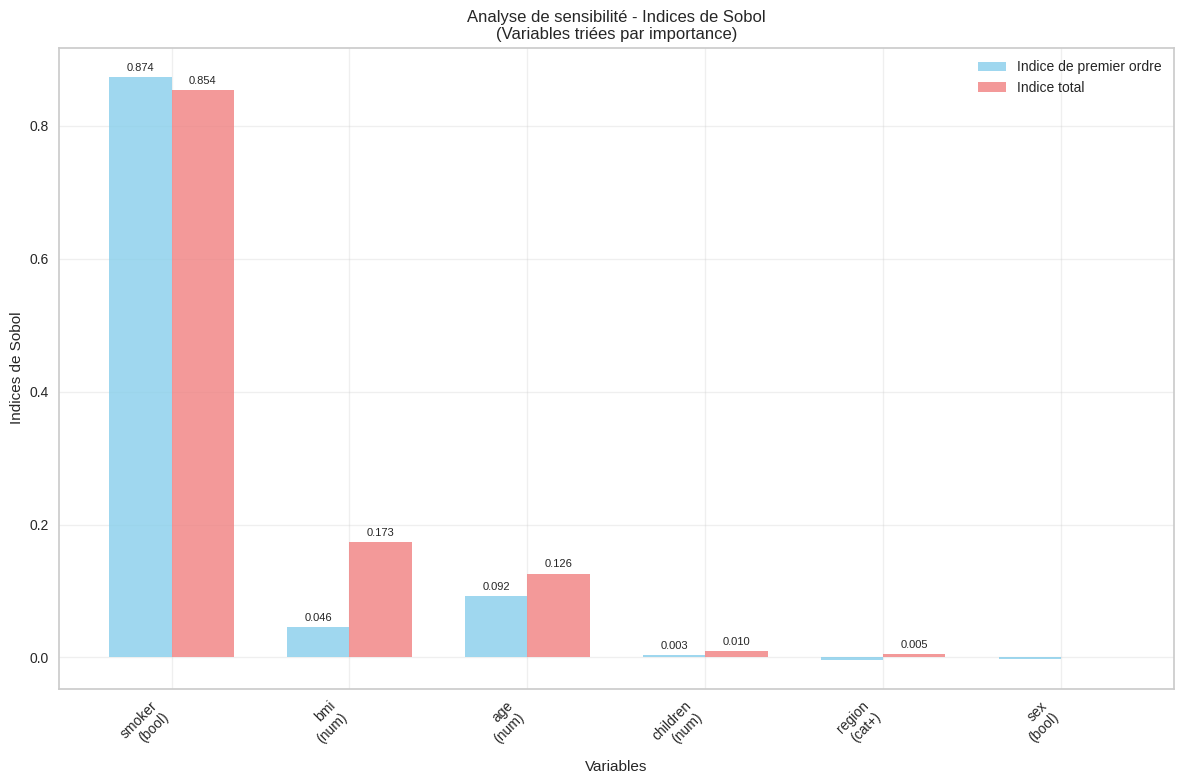

(<__main__.SobolAnalysisForRandomForest at 0x7ea81829fef0>,
 [{'variable': 'smoker',
   'type': 'binary_bool',
   'first_order_index': 0.8736082319578407,
   'total_order_index': 0.8539945212823007,
   'interaction_effect': -0.019613710675539964},
  {'variable': 'bmi',
   'type': 'numeric',
   'first_order_index': 0.04562522287331051,
   'total_order_index': 0.17344601365717235,
   'interaction_effect': 0.12782079078386185},
  {'variable': 'age',
   'type': 'numeric',
   'first_order_index': 0.09228793155593383,
   'total_order_index': 0.1263169102726877,
   'interaction_effect': 0.03402897871675388},
  {'variable': 'children',
   'type': 'numeric',
   'first_order_index': 0.0029636513660827044,
   'total_order_index': 0.010077005150647885,
   'interaction_effect': 0.00711335378456518},
  {'variable': 'region',
   'type': 'categorical',
   'first_order_index': -0.003189791295515351,
   'total_order_index': 0.005184517202533658,
   'interaction_effect': 0.008374308498049009},
  {'variab

In [26]:
sobol_analyzer = SobolAnalysisForRandomForest(X_train, grid_model.best_estimator_)
sobol_analyzer.run_complete_analysis(sobol_size=1000)

#**Sauvegarder le modèle**

In [28]:
import joblib
modele=best_model
joblib.dump(modele,'modele.pkl')

['modele.pkl']

# ***Campagne***

In [29]:
campaign=[[24,False,23,2,True,'Nord']]
x_cols=X.columns
campagne=pd.DataFrame(campaign,columns=x_cols)
campagne.to_csv('campagne.csv',index=False)
campagne

,age,sex,bmi,children,smoker,region
0,24,False,23,2,True,Nord


In [30]:
loaded_model = joblib.load('modele.pkl')
float(loaded_model.predict(campagne)[0])

16720.50953546827

# **API POUR LE MODELE**

In [ ]:
%%writefile application.py
from fastapi import FastAPI
from fastapi.staticfiles import StaticFiles
from fastapi.responses import FileResponse
from enum import Enum
from pydantic import BaseModel
import pandas as pd
import joblib

app = FastAPI(
    title="API de déploiement du modèle de machine learning",
    description="Cette API permet d’estimer les charges d’assurance santé à partir de données personnelles et comportementales du client. Elle prend en entrée des variables telles que l’âge, le sexe, l’indice de masse corporelle (IMC), le nombre d’enfants à charge, le statut de fumeur et la région de résidence. En sortie, elle retourne une estimation des frais médicaux ou des primes à payer, calculée par un modèle de machine learning entraîné sur des données d’assurance.",
    version="1.0",
    contact={
        "name": "Innocent BIGIRIMANA",
        "email": "gatoziinnocent@gmail.com",
        "url": "https://bigirimanainnocent12.github.io/PORTFOLIO/"
    }

)


# Monter le dossier statique
app.mount("/static", StaticFiles(directory="static"), name="static")

# Route pour servir le favicon
@app.get("/favicon.ico", include_in_schema=False)
async def favicon():
    return FileResponse("static/favicon.ico")

class Sexe(str, Enum):
    Homme = "Homme"
    Femme = "Femme"

class Smoker(str, Enum):
    Yes = "Yes"
    Non = "Non"

class Region(str, Enum):
    northeast = "Nord"
    northwest = "Sud"
    southeast = "Est"
    southwest = "Ouest"


class Caracteristique(BaseModel):
    age: int
    sexe: Sexe
    bmi: float
    children: int
    smoker: Smoker
    region: Region




def lire_model(modele):
    loaded_model = joblib.load(modele)
    if loaded_model is None:
        return "modele non load"
    else:
        return loaded_model




@app.get("/",tags=["info"])

def info():
    return {

   "message":"API PROJET COMPLET"
    }


@app.get("/deploiement/", tags=["info"])
def deploiement(age: int, sexe: Sexe, bmi: float, children: int, smoker: Smoker, region: Region):

    dicte = {
        "age": [age],
        "sex": [sexe.value],
        "bmi": [bmi],
        "children": [children],
        "smoker": [smoker.value],
        "region": [region.value]
    }



    campagne = pd.DataFrame(dicte)
    campagne['sex'] = campagne['sex'].map({'Homme': True, 'Femme': False})
    campagne['smoker'] = campagne['smoker'].map({'Yes': True, 'Non': False})

    modele = lire_model("modele.pkl")
    prediction = modele.predict(campagne)[0]

    return {"Sa charge est de ": prediction}



if __name__ == "__main__":
    import uvicorn
    uvicorn.run("application:app", host="localhost", port=8000)

Writing application.py
